### Import das bibliotecas utilizadas

In [59]:
import pandas as pd 
import pickle
import matplotlib.pyplot as plt
import numpy as np

### Seleciona acelX, acelY, acelZ e atividade

In [53]:
df = pd.read_excel("C:\\classificador-de-padroes-de-mobilidade\\dataset\\raw\\Comparativo_Alterado.xlsx")
df = df.rename(columns={"angle(X,gravityMean)":"acelX", "angle(Y,gravityMean)":"acelY", "angle(Z,gravityMean)":"acelZ", "Activity":"idTipoMovimento"})
filtro  = df['idTipoMovimento'] == "WALKING"
df = df[filtro]
df['idTipoMovimento'] = "Andando"

colunas_selecionadas = ['acelX', 'acelY', 'acelZ', 'idTipoMovimento']

df_andando = df[colunas_selecionadas]

### Mensurar volume do dataset

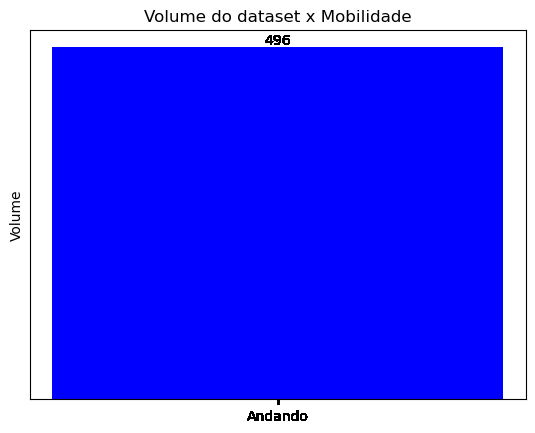

In [58]:
id_andando  = df_andando['idTipoMovimento']

eixo_x = id_andando
contagem = len(df_andando)
cores_barras = 'blue'
legenda_barras = 'andando'

fig, ax = plt.subplots()

bar_container = ax.bar(eixo_x, contagem, label=legenda_barras, color=cores_barras)
ax.bar_label(bar_container, fmt='{:.0f}')
ax.set_title('Volume do dataset x Mobilidade')
# ax.set_xlabel('Mobilidade')
ax.set_ylabel('Volume')
# ax.legend()
plt.yticks([]) # Remover escala do eixo y
plt.xticks(eixo_x)
plt.savefig('C:\\classificador-de-padroes-de-mobilidade\\results\\graphs\\volume_dataset_comparativo_por_mobilidade.png')
plt.show()

### Adiciona cálculo da magnitude da aceleração

In [60]:
df_andando['MAGNITUDE_ACEL']   = np.sqrt(df_andando['acelX']**2 + df_andando['acelY']**2 + df_andando['acelZ']**2)

### Teste do modelo

In [62]:
df_teste_modelo = df_andando
df_teste_modelo = df_teste_modelo.drop(columns=['idTipoMovimento'])
    
with open('modelos/svm_model.pkl', 'rb') as file:
    knn_loaded = pickle.load(file)
    
X_test = df_teste_modelo

y_pred = knn_loaded.predict(X_test)

print("Previsões: ", y_pred)

with open('predicoes/svm_comparativo_predicoes.txt', 'w') as f:
    for pred in y_pred:
        f.write(f"{pred}\n")

print("Previsões salvas no arquivo 'predicoes/dt_predicoes.txt'")

Previsões:  ['Andando' 'Andando' 'Andando' 'Andando' 'Andando' 'Andando' 'Andando'
 'Andando' 'Andando' 'Andando' 'Andando' 'Andando' 'Andando' 'Andando'
 'Andando' 'Andando' 'Andando' 'Andando' 'Andando' 'Andando' 'Andando'
 'Andando' 'Andando' 'Andando' 'Andando' 'Andando' 'Andando' 'Andando'
 'Andando' 'Andando' 'Andando' 'Andando' 'Andando' 'Andando' 'Andando'
 'Andando' 'Andando' 'Andando' 'Andando' 'Andando' 'Andando' 'Andando'
 'Andando' 'Andando' 'Andando' 'Andando' 'Andando' 'Andando' 'Andando'
 'Andando' 'Andando' 'Andando' 'Andando' 'Andando' 'Andando' 'Andando'
 'Andando' 'Andando' 'Andando' 'Andando' 'Andando' 'Andando' 'Andando'
 'Andando' 'Andando' 'Andando' 'Andando' 'Andando' 'Andando' 'Andando'
 'Andando' 'Andando' 'Andando' 'Andando' 'Andando' 'Andando' 'Andando'
 'Andando' 'Andando' 'Andando' 'Andando' 'Andando' 'Andando' 'Andando'
 'Andando' 'Andando' 'Andando' 'Andando' 'Andando' 'Andando' 'Andando'
 'Andando' 'Andando' 'Andando' 'Andando' 'Andando' 'Andando' 'And

c:\Users\julia\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
